In [1]:
# plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# data visualization
import seaborn as sns
from helper_functions import plot_setup
sns.set_style('white')
plot_setup()

# data analysis
import pandas as pd

# data mining & ML
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# Getting Started with the Data

We will be working with the [Titanic Dataset](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html).

### Some Background before you Start

"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others." -- Kaggle

In this exploration, we will complete analysis to predict which factors made individuals more or less likely to survive the Titanic. We will build up predictive machine learning models that model the likelihood of survival for an individual based on various features of this person. Then we will use these models to predict the likelihood of survival for unknown people.

### Loading and Pre-processing

Before we get started with analysis, we begin with the first part of any machine learning exploration: Loading the data and cleaning it up for analyis.

Typical datasets are messy.
* Data can, and often is missing.
* Sometimes data is invalid.
* You might have much more data available than you need.
* You may also need to change your data types, so they are compatible with your algorithms. This is just a short set of the way that data sets in the wild can be imperfect.

These data sets require preprocessing to get them into the format which a library like scikit-learn can use.

**Let's first load our data set and take a look at some of the data to get an idea of what type of preprocessing we might need.**

In [2]:
data_url = 'https://raw.githubusercontent.com/marijavlajic/code-university-ml-workshop/master/titanic.csv'
titanic = pd.read_csv(data_url, sep = ';')

[...] Let's see what data is available to us. [...]

In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic.columns.tolist()

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

[...] ^ Explain that `survived` is a label, everything else is a feature. [...]  
* _Remove boat, body, and home.dest from the original dataset?_
* _Write out what each column represents._

[...] Decimal numbers in the dataset are expressed using commas rather than period, so we need to replace all commas in the dataframe with periods so that we can work with them properly. [...]

In [5]:
titanic.replace(',', '.', inplace = True, regex = True)

[...] When the dataset is first loaded some numeric columns are represented as object types instead so we need to convert them to numeric types. [...]

In [6]:
titanic[['age', 'fare']] = titanic[['age', 'fare']].apply(pd.to_numeric)

In [7]:
titanic['family_members'] = titanic['sibsp'] + titanic['parch']
titanic['family_status'] = 'alone'
titanic['family_status'][titanic['family_members'] != 0] = 'with family'

# Plotting the data

The first step of machine learning is understanding the data that you are working with. This helps you get a sense of which features might be the most important, which algorithms make the most sense for your data, etc.

What do you think might distinguish the people who survived the Titanic from the ones who didn't? Plot the data and see what initial insights you can get.

In [8]:
# ax = plt.gca()
# titanic['age'][titanic['survived'] == 1].hist(bins = range(0, 100, 5), alpha = 0.4, normed = True, label = 'survived')
# titanic['age'][titanic['survived'] == 0].hist(bins = range(0, 100, 5), alpha = 0.4, normed = True, label = 'did not survive')
# ax.legend()

In [9]:
# ax = plt.gca()
# titanic['fare'][titanic['survived'] == 1].hist(bins = range(0, 100, 10), alpha = 0.4, normed = True, label = 'survived')
# titanic['fare'][titanic['survived'] == 0].hist(bins = range(0, 100, 10), alpha = 0.4, normed = True, label = 'did not survive')
# plt.xlim(-10, 100)
# ax.legend()

How does age affect people's likelihood of survival?

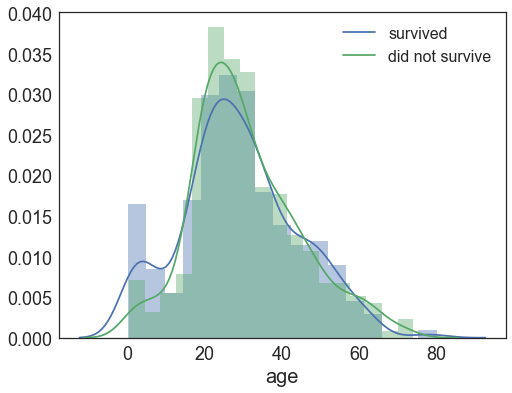

In [10]:
sns.distplot(a = titanic['age'][titanic['survived'] == 1].dropna(), kde_kws = {'label': 'survived'})
sns.distplot(a = titanic['age'][titanic['survived'] == 0].dropna(), kde_kws = {'label': 'did not survive'})

What about the price of their ticket?

[(-20, 100)]

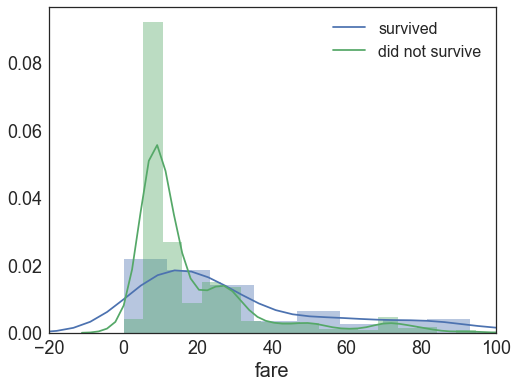

In [11]:
sns.distplot(a = titanic['fare'][titanic['survived'] == 1].dropna(), kde_kws = {'label': 'survived'})
ax = sns.distplot(a = titanic['fare'][titanic['survived'] == 0].dropna(), kde_kws = {'label': 'did not survive'})
ax.set(xlim = (-20, 100))

What else could influence whether they were going to live or die? Maybe their gender?

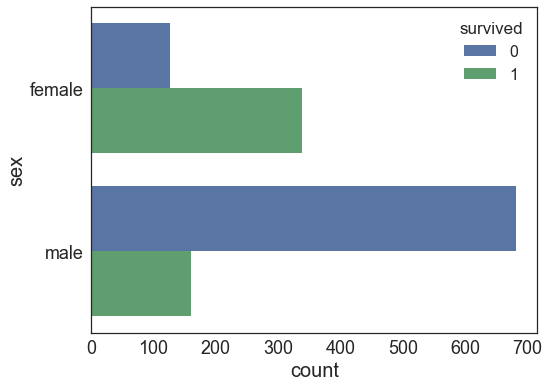

In [12]:
sns.countplot(data = titanic, y = 'sex', hue = 'survived')

_Decide between the plot above or below._

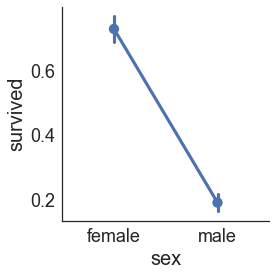

In [13]:
sns.factorplot('sex', 'survived', data = titanic)

In [14]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'family_members', 'family_status'],
      dtype='object')

In [15]:
titanic.groupby('sex').mean()

,pclass,survived,age,sibsp,parch,fare,body,family_members
sex,,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500,1.285408
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823,0.661922


Would their passenger class have an effect?

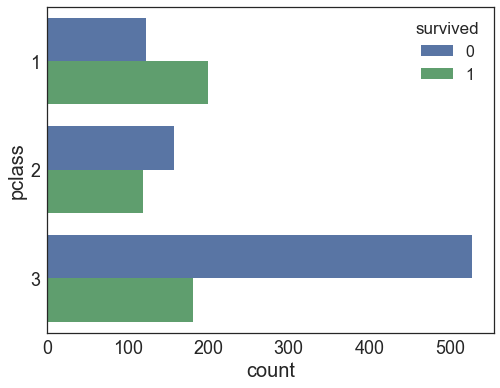

In [16]:
sns.countplot(data = titanic, y = 'pclass', hue = 'survived')

_Decide between the plot above or below._

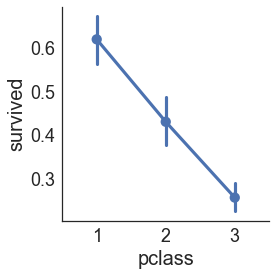

In [17]:
sns.factorplot('pclass', 'survived', data = titanic)

In [18]:
titanic.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body,family_members
pclass,,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571,0.801858
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097,0.761733
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182,0.968970


Now let's look at how the combination of gender and passenger class influences the survival rates.

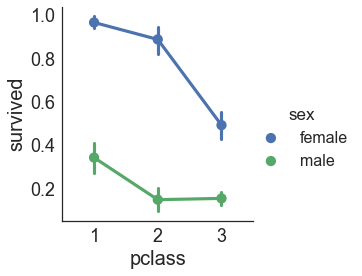

In [19]:
sns.factorplot('pclass', 'survived', hue = 'sex', data = titanic.sort_values(by = 'pclass'))

We divided people into those traveling along or with family. How did that affect whether they were going to survive?

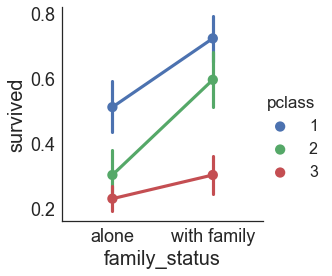

In [20]:
sns.factorplot('family_status', 'survived', hue = 'pclass', data = titanic.sort_values(by = 'family_members'))

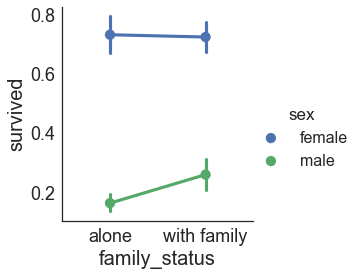

In [21]:
sns.factorplot('family_status', 'survived', hue = 'sex', data = titanic.sort_values(by = 'family_members'))

# Preparing the data

Do we have all values available for all passengers?

In [22]:
titanic.count()

pclass            1309
survived          1309
name              1309
sex               1309
age               1046
sibsp             1309
parch             1309
ticket            1309
fare              1308
cabin              295
embarked          1307
boat               486
body               121
home.dest          745
family_members    1309
family_status     1309
dtype: int64

Some of the columns have significantly fewer values that others. Since machine learning models don't deal with missing values well, we'll remove these columns.

In [23]:
titanic.drop(['cabin', 'boat', 'body', 'home.dest'], axis = 1, inplace = True)

Now age is the column remaining with most missing values. Because we saw that age influences survival rates some, we don't want to exclude the age, so we'll just remove all of the missing values in the rest of the dataframe.

In [24]:
titanic.dropna(inplace = True)

And now instead of 1309, we have 1043 rows. We lost about 20% of the data which isn't ideal but also not that bad.

In [25]:
titanic.count()

pclass            1043
survived          1043
name              1043
sex               1043
age               1043
sibsp             1043
parch             1043
ticket            1043
fare              1043
embarked          1043
family_members    1043
family_status     1043
dtype: int64

Let's look at what kind of data we have left in the dataframe. 

In [26]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family_members,family_status
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,S,0,alone
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,S,3,with family
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,S,3,with family
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,S,3,with family
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,S,3,with family


pclass is a numerical value taking values 1, 2, and 3. etc. `sex` is right now a string, but responds to a category. We call these variables categorical variables. In order for machine learning model to work with them properly, we need to encode them as categories. `embarked` and `family_status` are also these variables.

In [27]:
label_encoder = preprocessing.LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])
titanic['family_status'] = label_encoder.fit_transform(titanic['family_status'])

`name` and `ticket` are also strings but do not correspond to categories. Since name doesn't seem like something we'd want to use in our model, as well as the ticket number, we'll remove these variables too.

In [28]:
titanic.drop(['name', 'ticket'], axis = 1, inplace = True)

In [29]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,family_members,family_status
0,1,1,0,29.0000,0,0,211.3375,2,0,0
1,1,1,1,0.9167,1,2,151.5500,2,3,1
2,1,0,0,2.0000,1,2,151.5500,2,3,1
3,1,0,1,30.0000,1,2,151.5500,2,3,1
4,1,0,0,25.0000,1,2,151.5500,2,3,1


In [30]:
titanic.to_csv('titanic_processed.csv', index = False)